# Quantium Retail C/T Analysis

<div style="text-align: center;">
    <img src="https://live.staticflickr.com/3246/3102914696_97c7e02079_c.jpg" alt="Chips" style="width: 500px;" />
</div>


<span style="font-size: 18px;">In continuation of analysis into the performance of our chips stores, focusing on a comparative assessment between trial and control stores. This analysis aims to provide valuable insights into the effectiveness of the company's recent initiatives and their impact on overall store performance.
<br>
<br>
The primary objective of this analysis is to evaluate the performance metrics of trial stores, where new strategies and operational changes have been implemented, against control stores, which continue to operate under existing protocols. By comparing these two groups, we aim to identify key performance indicators (KPIs) that demonstrate the success or areas for improvement of our new initiatives.</span>

## Libraries and Data

In [1]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import seaborn as sns

In [2]:
# Read file

data=pd.read_csv("Merged_QVI.csv")
data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large,Wednesday,October,2018,10/2018,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large,Tuesday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
2,2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large,Monday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
3,3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium,Saturday,August,2018,08/2018,MIDAGE SINGLES/COUPLES,Budget
4,4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,Extra Large,Sunday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget


## EDA and Cleaning

In [3]:
data.columns

Index(['Unnamed: 0', 'DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID',
       'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PKT_WGT',
       'BRAND_NAME', 'SIZE_CATEGORY', 'DAY_NAME', 'MONTH_NAME', 'YEAR',
       'MONTHYEAR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PKT_WGT,YEAR
count,264383.00000,2.643830e+05,2.643830e+05,264383.000000,264383.000000,264383.000000,264383.000000,264383.000000
mean,135.07710,1.355470e+05,1.351555e+05,56.580851,1.900546,7.280823,182.425814,2018.495221
std,76.78481,8.058695e+04,7.813366e+04,32.825474,0.319102,2.478540,64.324375,0.499978
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000,2018.000000
25%,70.00000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000,150.000000,2018.000000
50%,130.00000,1.303560e+05,1.351330e+05,56.000000,2.000000,7.400000,170.000000,2018.000000
75%,203.00000,2.030940e+05,2.026985e+05,85.000000,2.000000,8.800000,175.000000,2019.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,4.000000,23.600000,380.000000,2019.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264383 entries, 0 to 264382
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264383 non-null  object 
 1   STORE_NBR         264383 non-null  int64  
 2   LYLTY_CARD_NBR    264383 non-null  int64  
 3   TXN_ID            264383 non-null  int64  
 4   PROD_NBR          264383 non-null  int64  
 5   PROD_NAME         264383 non-null  object 
 6   PROD_QTY          264383 non-null  int64  
 7   TOT_SALES         264383 non-null  float64
 8   PKT_WGT           264383 non-null  int64  
 9   BRAND_NAME        264383 non-null  object 
 10  SIZE_CATEGORY     264383 non-null  object 
 11  DAY_NAME          264383 non-null  object 
 12  MONTH_NAME        264383 non-null  object 
 13  YEAR              264383 non-null  int64  
 14  MONTHYEAR         264383 non-null  object 
 15  LIFESTAGE         264383 non-null  object 
 16  PREMIUM_CUSTOMER  26

In [7]:
# Convert DATE to datetime
data['DATE']=pd.to_datetime(data['DATE'])
data['MONTHYEAR']=pd.to_datetime(data['MONTHYEAR'])

C:\Users\USER\AppData\Local\Temp\ipykernel_23568\2621314140.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['MONTHYEAR']=pd.to_datetime(data['MONTHYEAR'])


In [8]:
# To check for duplicates

In [9]:
data[data.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR,LIFESTAGE,PREMIUM_CUSTOMER


In [10]:
data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PKT_WGT             0
BRAND_NAME          0
SIZE_CATEGORY       0
DAY_NAME            0
MONTH_NAME          0
YEAR                0
MONTHYEAR           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Selecting Control Stores

In [11]:
# Select the start of the trial period which is between February 2019 and March 2019

In [12]:
trial_month_start = '02/2019'
trial_month_end = '04/2019'

# Convert the trial month to datetime format
trial_month_dt = pd.to_datetime(trial_month_start)
trial_month_end_dt = pd.to_datetime(trial_month_end)

# Filter data for months greater than the trial month
pretrial_data = data[data['MONTHYEAR'] < trial_month_dt]

In [13]:
pretrial_data.to_csv("pretrial.csv")

In [14]:
# Sales revenue will be used as the metric of choice to determine the control stores.
# Other metrics that could be used include customer counts, product sold etc

In [15]:
# Determine the monthly sales revenue per month and stores

In [16]:
column_names = ["STORE_NBR", "MONTHYEAR"]

total_sales_month_store = pretrial_data.groupby(column_names)['TOT_SALES'].sum()
total_sales_month_store

STORE_NBR  MONTHYEAR 
1          2018-07-01    206.9
           2018-08-01    176.1
           2018-09-01    278.8
           2018-10-01    188.1
           2018-11-01    192.6
                         ...  
272        2018-09-01    304.7
           2018-10-01    430.6
           2018-11-01    376.2
           2018-12-01    403.9
           2019-01-01    423.0
Name: TOT_SALES, Length: 1848, dtype: float64

In [17]:
# Monthly sales revenue by stores

In [18]:
column_names = ["STORE_NBR"]
stat_summary = {"TOT_SALES":"sum"}

total_sales_store = pretrial_data.groupby(column_names).agg(stat_summary)
total_sales_store

,TOT_SALES
STORE_NBR,
1,1386.90
2,1113.50
3,7498.95
4,9127.00
5,5717.70
...,...
268,1530.05
269,6611.00
270,6670.95


In [19]:
# Monthly sales revenue by month

In [20]:
column_names=["MONTHYEAR"]
stat_summary={"TOT_SALES":"sum"}

total_sales_month=pretrial_data.groupby(column_names).agg(stat_summary)
total_sales_month

,TOT_SALES
MONTHYEAR,
2018-07-01,165275.3
2018-08-01,153802.1
2018-09-01,160522.0
2018-10-01,164409.7
2018-11-01,160233.7
2018-12-01,167913.4
2019-01-01,162642.3


In [21]:
# Checck the total sales of trial stores to perform comparisons

In [22]:
trial_stores_sale = total_sales_store.loc[[77, 86, 88]]
trial_stores_sale

,TOT_SALES
STORE_NBR,
77,1699.00
86,6111.35
88,9361.60


| Trial Store | Total Sales | Control Store | Total Sales |
| --- | --- | --- | --- |
| Store 77 | 1699.00 | - | - |
| Store 86 | 6119.85 | - | - |
| Store 88 | 9361.60 | - | - |

In [23]:
# Finding a control store for Store 77
# This is done by iterating over several rows to find one with the store as a median

In [134]:
total_sales_sorted = total_sales_store.sort_values(by='TOT_SALES')

# Determine the index of store 77
index_position = total_sales_sorted.index.get_loc(77)
    
# Get the range of indexes
start = index_position - 6
end = index_position + 6 # +5 to include 5 indexes below
print (f'{start}:{end}')

63:75


In [135]:
total_sales_sorted.iloc[63:75]

,TOT_SALES
STORE_NBR,
53,1611.1
6,1618.8
255,1636.6
233,1636.8
188,1683.5
187,1684.2
77,1699.0
90,1727.9
46,1758.0


In [136]:
# Isolating the other stores
# Select the rows using iloc
selected_rows = total_sales_sorted.iloc[64:74]

# Extract the index as a list
index_list = selected_rows.index.tolist()

control_store_77 = pd.DataFrame({'Values':total_sales_month_store[index_list]})

In [137]:
control_store_77

Values
STORE_NBR MONTHYEAR         
6         2018-07-01   260.0
          2018-08-01   203.2
          2018-09-01   207.7
          2018-10-01   292.4
          2018-11-01   255.3
...                      ...
220       2018-09-01   219.3
          2018-10-01   293.4
          2018-11-01   290.7
          2018-12-01   227.4
          2019-01-01   238.7

[70 rows x 1 columns]

In [138]:
# Placing control store of 77 in a pivot table

In [139]:
pivot_df_1 = control_store_77.pivot_table(index='MONTHYEAR', columns='STORE_NBR', values='Values')
pivot_df_1

STORE_NBR,6,46,77,90,187,188,205,220,233,255
MONTHYEAR,,,,,,,,,,
2018-07-01,260.0,253.0,296.8,235.4,253.9,234.4,320.6,244.1,290.7,254.1
2018-08-01,203.2,240.7,255.5,216.0,196.3,210.3,269.1,275.0,262.9,171.9
2018-09-01,207.7,233.0,225.2,162.4,276.1,280.8,215.5,219.3,228.6,227.7
2018-10-01,292.4,275.1,204.5,319.4,181.4,246.3,274.7,293.4,185.7,235.6
2018-11-01,255.3,273.1,245.3,226.2,327.9,236.8,224.2,290.7,211.6,253.2
2018-12-01,209.1,306.9,267.3,262.7,264.4,266.8,219.5,227.4,279.8,262.4
2019-01-01,191.1,176.2,204.4,305.8,184.2,208.1,256.1,238.7,177.5,231.7


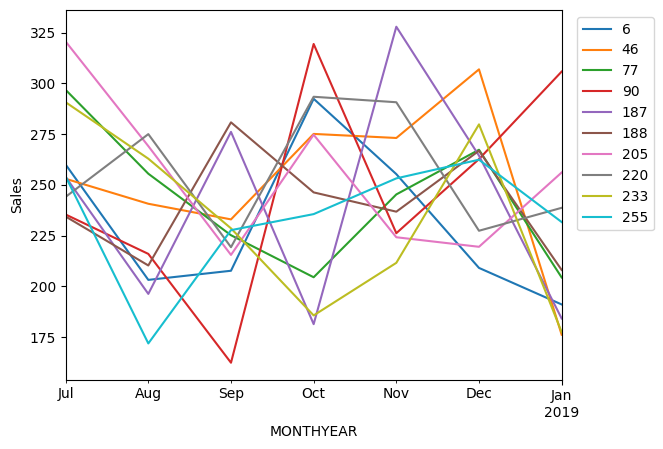

In [140]:
# Vizualizations
pivot_df_1.plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.ylabel('Sales')
plt.savefig("store.jpeg", dpi=1000, format='jpeg')
plt.show()

In [33]:
# To check each stores by store 77

In [141]:
pivot_df_77 = pivot_df_1.reset_index()

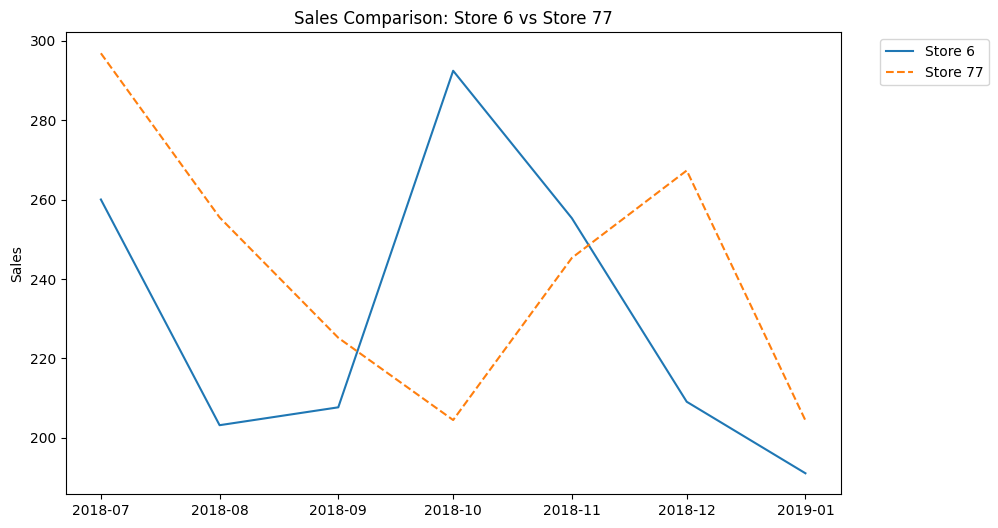

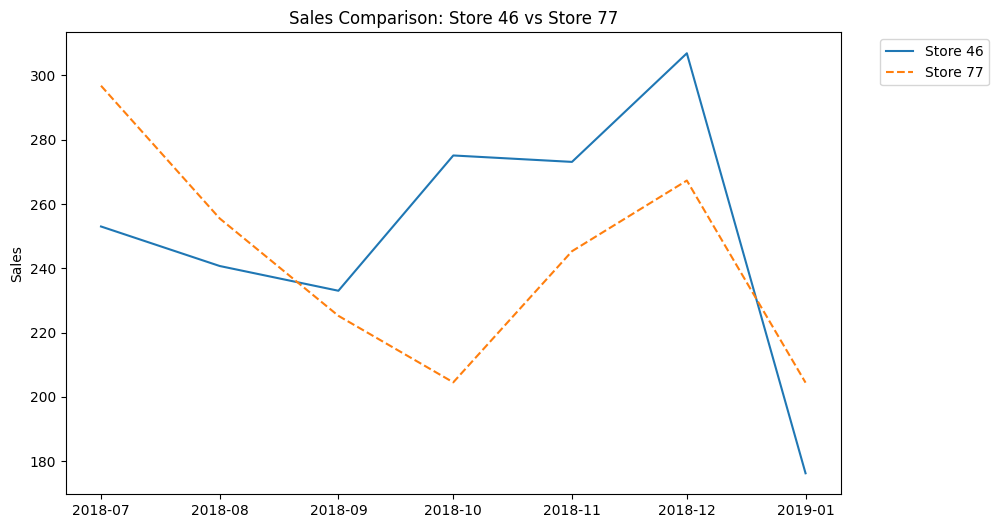

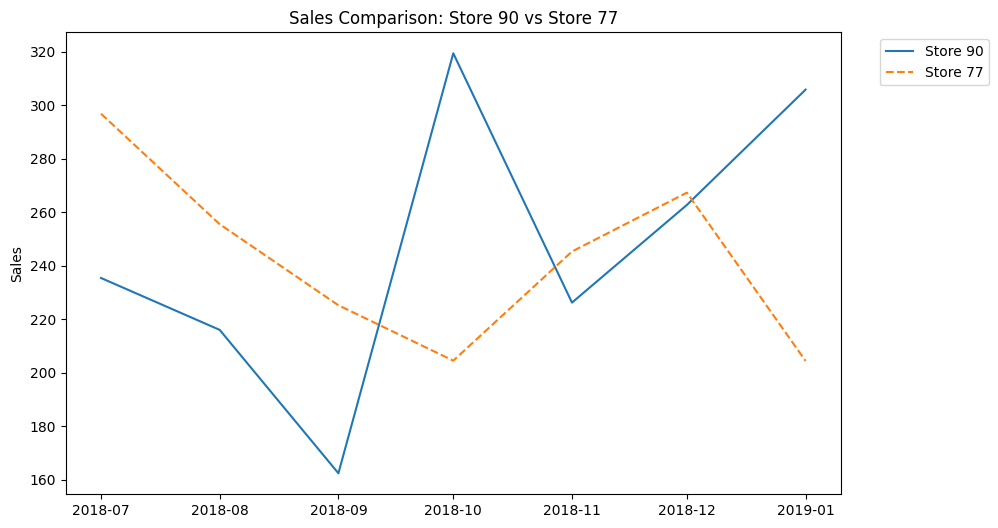

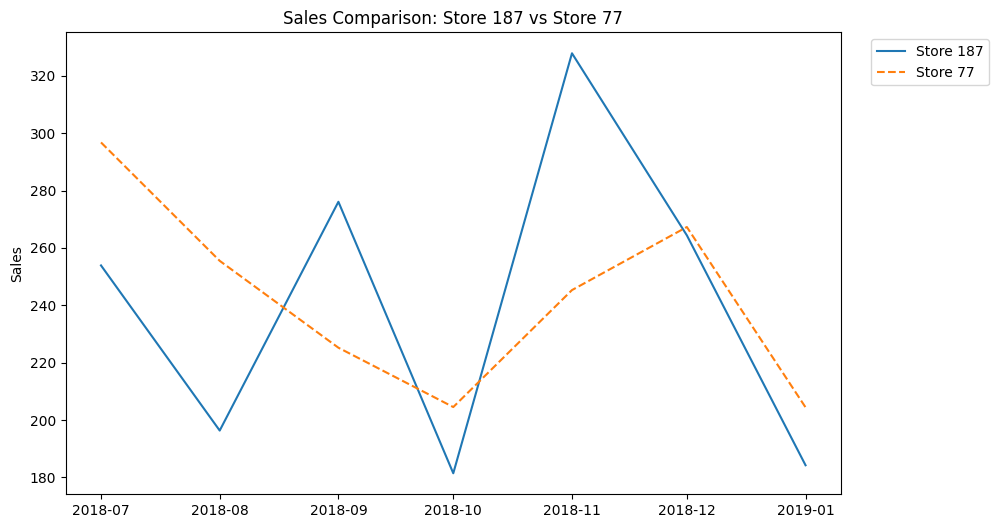

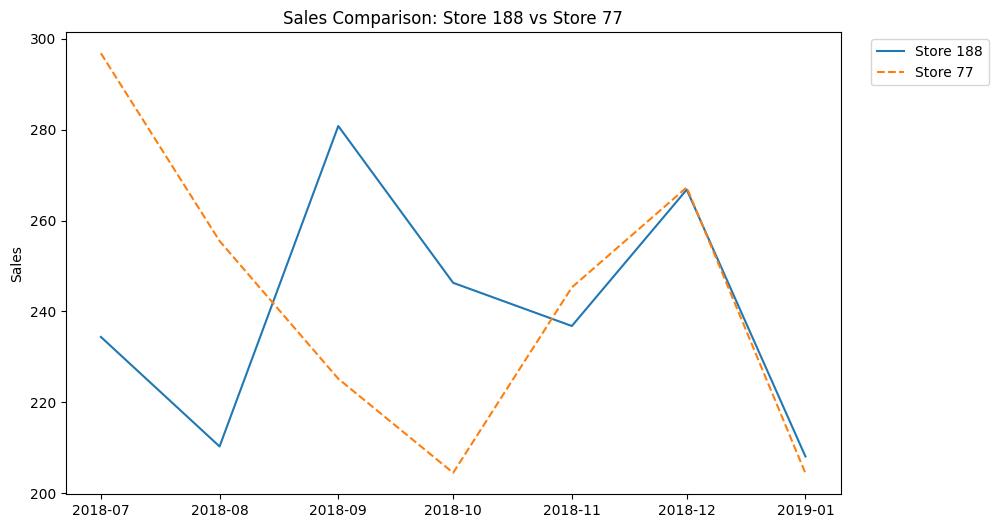

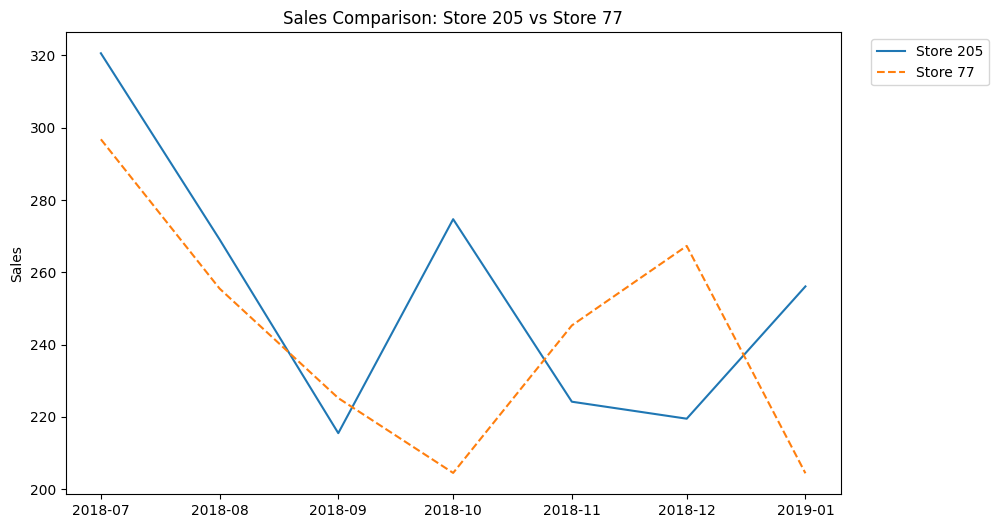

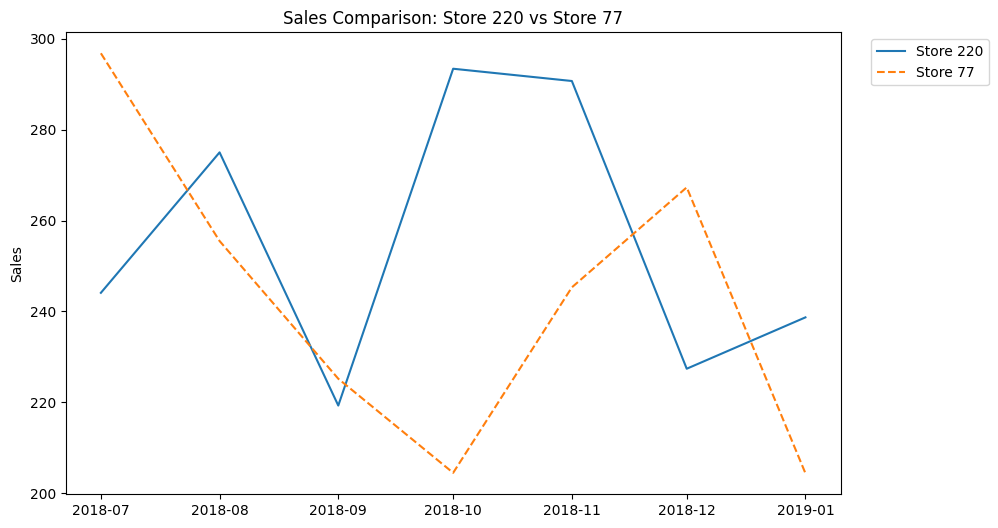

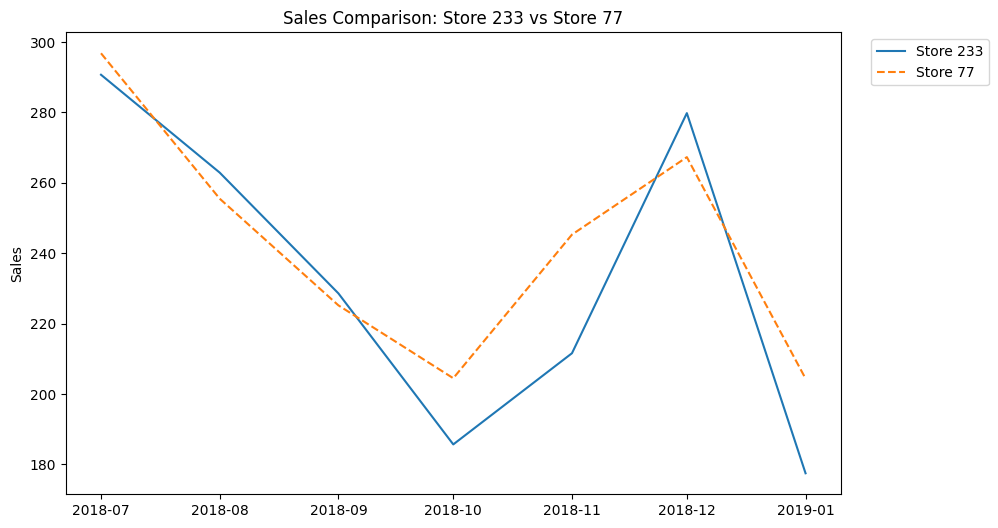

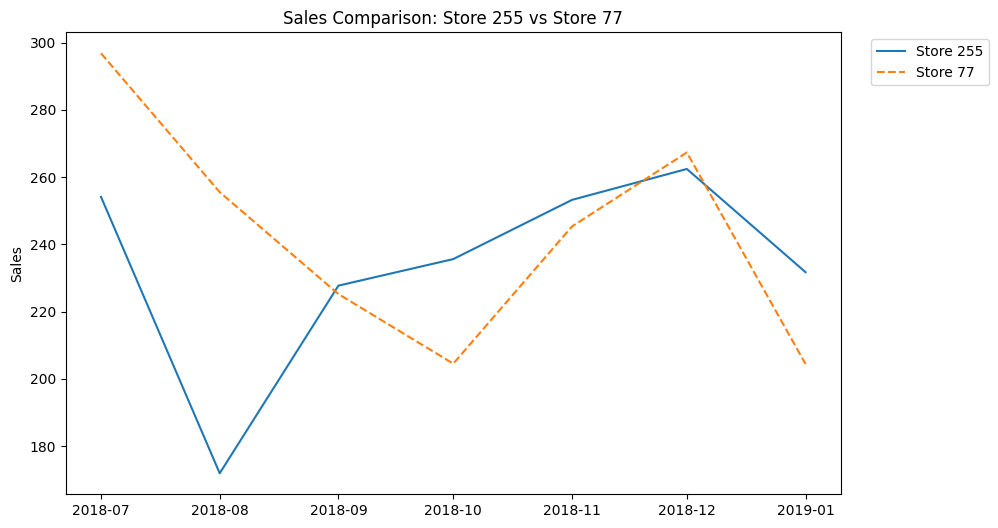

In [142]:
for column in pivot_df_77.columns:
    if column != 77 and column != 'MONTHYEAR':
        plt.figure(figsize=(10, 6))
        plt.plot(pivot_df_77['MONTHYEAR'], pivot_df_77[column], label=f'Store {column}')
        plt.plot(pivot_df_77['MONTHYEAR'], pivot_df_77[77], label='Store 77', linestyle='--')
        plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
        plt.ylabel('Sales')
        plt.title(f'Sales Comparison: Store {column} vs Store 77')
        plt.show()

__Store 233 show a similar trend__

In [143]:
# Perform correlation

In [144]:
df_corr = pivot_df_77.corr()
df_corr

STORE_NBR,MONTHYEAR,6,46,77,90,187,188,205,220,233,255
STORE_NBR,,,,,,,,,,,
MONTHYEAR,1.000000,-0.301603,-0.110069,-0.532009,0.521681,-0.028182,-0.027747,-0.579251,-0.101216,-0.554210,0.353895
6,-0.301603,1.000000,0.484580,0.042490,0.304490,0.080284,0.115455,0.420629,0.641903,-0.126162,0.363013
46,-0.110069,0.484580,1.000000,0.435650,-0.031015,0.431357,0.527886,-0.167415,0.239256,0.451270,0.402832
77,-0.532009,0.042490,0.435650,1.000000,-0.382492,0.423312,0.042708,0.344951,-0.183091,0.935848,0.191091
90,0.521681,0.304490,-0.031015,-0.382492,1.000000,-0.603311,-0.387441,0.300877,0.320254,-0.458887,0.229030
187,-0.028182,0.080284,0.431357,0.423312,-0.603311,1.000000,0.501156,-0.470415,-0.118229,0.298842,0.517691
188,-0.027747,0.115455,0.527886,0.042708,-0.387441,0.501156,1.000000,-0.514060,-0.422733,0.192103,0.461834
205,-0.579251,0.420629,-0.167415,0.344951,0.300877,-0.470415,-0.514060,1.000000,0.230264,0.232508,-0.127709
220,-0.101216,0.641903,0.239256,-0.183091,0.320254,-0.118229,-0.422733,0.230264,1.000000,-0.345035,-0.223507


__Store 233 has a 94% correlation with store 77__

<Axes: xlabel='STORE_NBR', ylabel='STORE_NBR'>

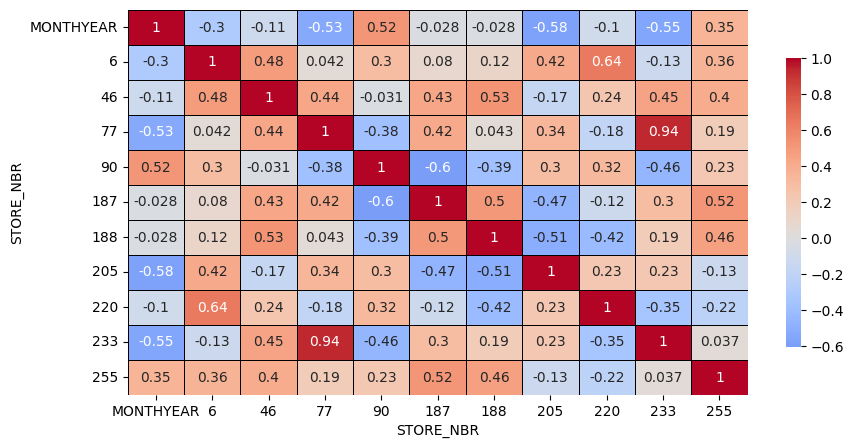

In [145]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_corr, annot=True, fmt='.2g', center=0, cmap='coolwarm', 
                      linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75},
                      annot_kws={"size": 10})  # Adjust font size for annotations
heatmap

| Trial Store | Total Sales | Control Store | Total Sales |
| --- | --- | --- | --- |
| Store 77 | 1699.00 | Store 233 | 1659.8 |
| Store 86 | 6119.85 | - | - |
| Store 88 | 9383.60 | - | - |

In [146]:
# Finding a control store for store 86

In [152]:
# Determine the index of store 86
index_position = total_sales_sorted.index.get_loc(86)
    
# Get the range of indexes
start = index_position - 7
end = index_position + 5 # +5 to include 5 indexes below
print (f'{start}:{end}')

174:186


In [153]:
total_sales_sorted.iloc[174:186]

,TOT_SALES
STORE_NBR,
225,6055.10
172,6076.40
23,6080.40
207,6083.10
48,6091.30
13,6098.20
57,6109.90
86,6111.35
196,6117.80


In [154]:
# Isolating the other stores
# Select the rows using iloc
selected_rows_86 = total_sales_sorted.iloc[174:186]

# Extract the index as a list
index_list_86 = selected_rows_86.index.tolist()

control_store_86 = pd.DataFrame({'Values':total_sales_month_store[index_list_86]})

In [155]:
control_store_86

Values
STORE_NBR MONTHYEAR         
225       2018-07-01   865.0
          2018-08-01   797.9
          2018-09-01   958.4
          2018-10-01   921.8
          2018-11-01   832.4
...                      ...
91        2018-09-01  1000.1
          2018-10-01   851.8
          2018-11-01   911.2
          2018-12-01   866.8
          2019-01-01   856.3

[84 rows x 1 columns]

In [156]:
# Placing control store of 86 in a pivot table

In [157]:
pivot_df_2 = control_store_86.pivot_table(index='MONTHYEAR', columns='STORE_NBR', values='Values')
pivot_df_2

STORE_NBR,13,23,30,48,57,86,91,172,196,207,225,236
MONTHYEAR,,,,,,,,,,,,
2018-07-01,811.8,890.8,879.8,929.4,839.6,892.20,827.7,820.8,876.2,934.2,865.0,952.0
2018-08-01,740.4,933.6,895.8,830.1,877.9,755.55,863.6,721.0,840.2,812.1,797.9,941.3
2018-09-01,840.0,720.8,860.6,809.8,792.8,914.60,1000.1,816.4,858.4,773.2,958.4,864.6
2018-10-01,851.0,793.4,862.6,879.2,965.8,948.40,851.8,1040.8,846.0,920.6,921.8,879.6
2018-11-01,1049.4,826.0,819.0,785.4,830.0,918.00,911.2,851.4,770.2,989.4,832.4,705.2
2018-12-01,878.6,985.0,1014.0,917.2,951.0,841.20,866.8,928.8,1007.4,812.4,834.6,987.0
2019-01-01,927.0,930.8,822.8,940.2,852.8,841.40,856.3,897.2,919.4,841.2,845.0,838.2


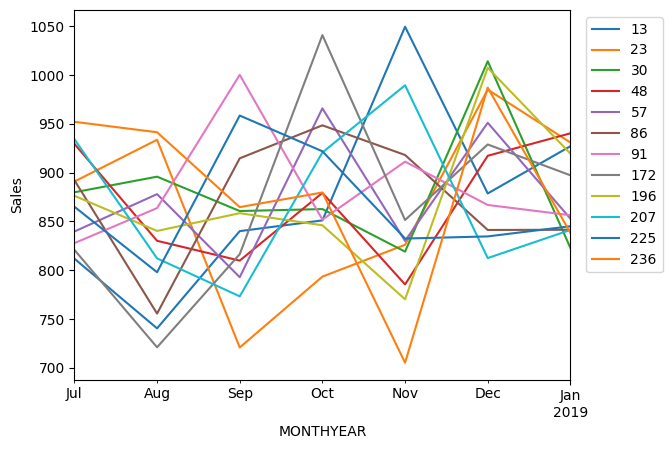

In [158]:
# Vizualizations
pivot_df_2.plot()
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2,1))
plt.ylabel('Sales')
plt.show()

In [159]:
# To check each stores by store 86

In [161]:
pivot_df_86 = pivot_df_2.reset_index()

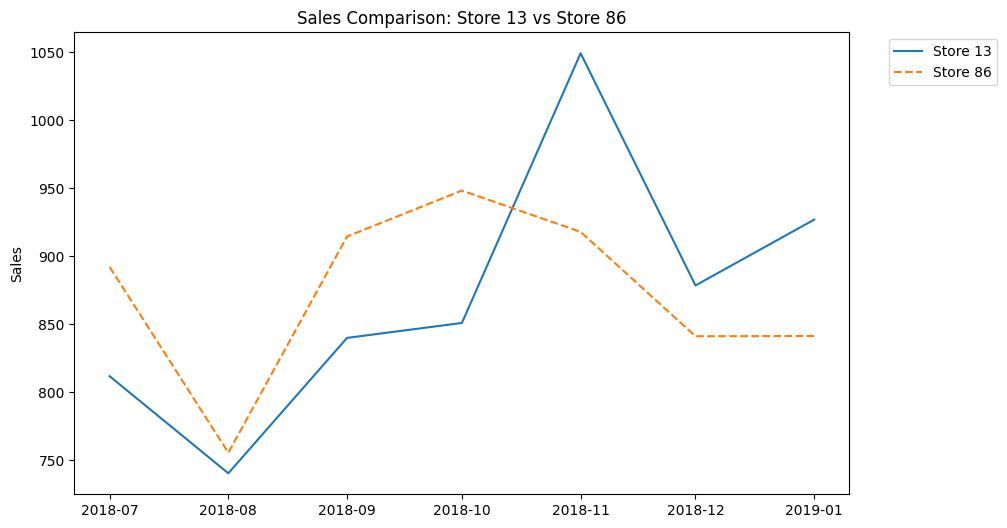

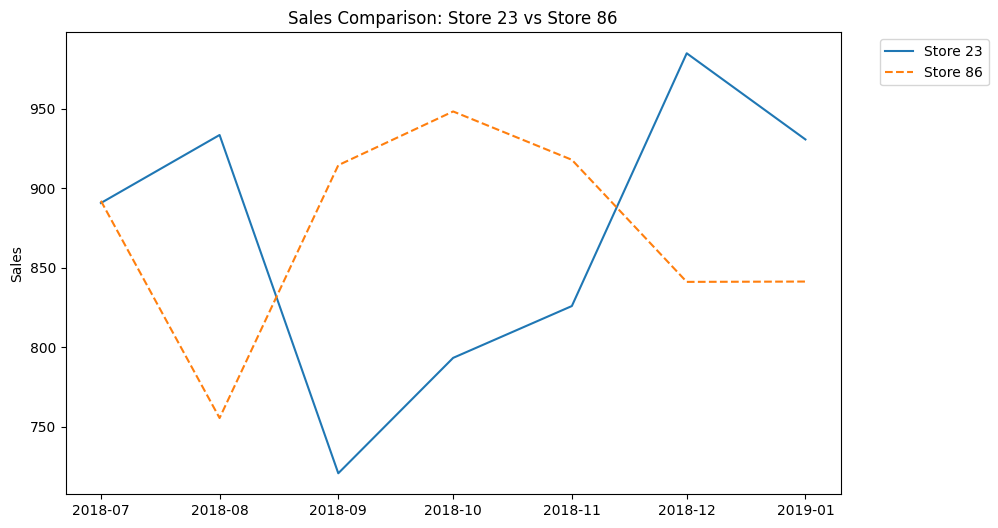

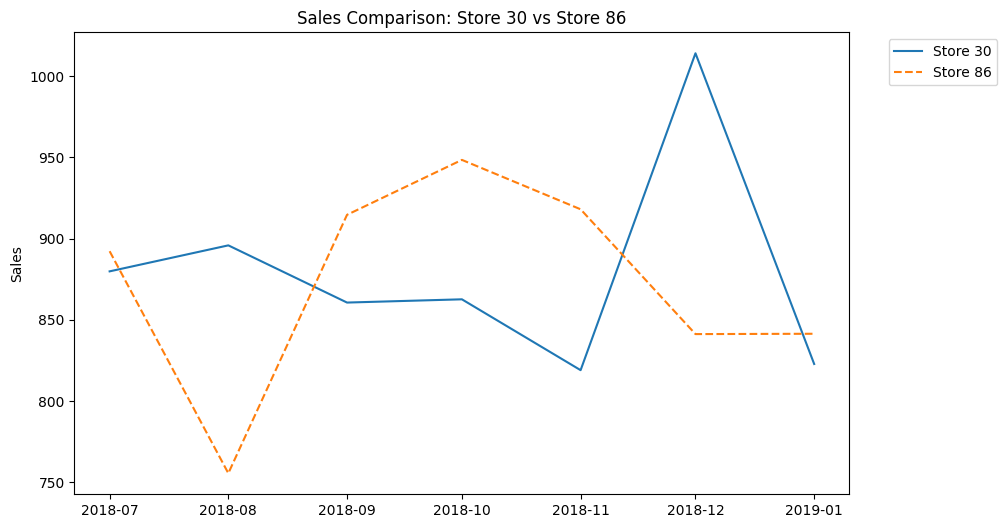

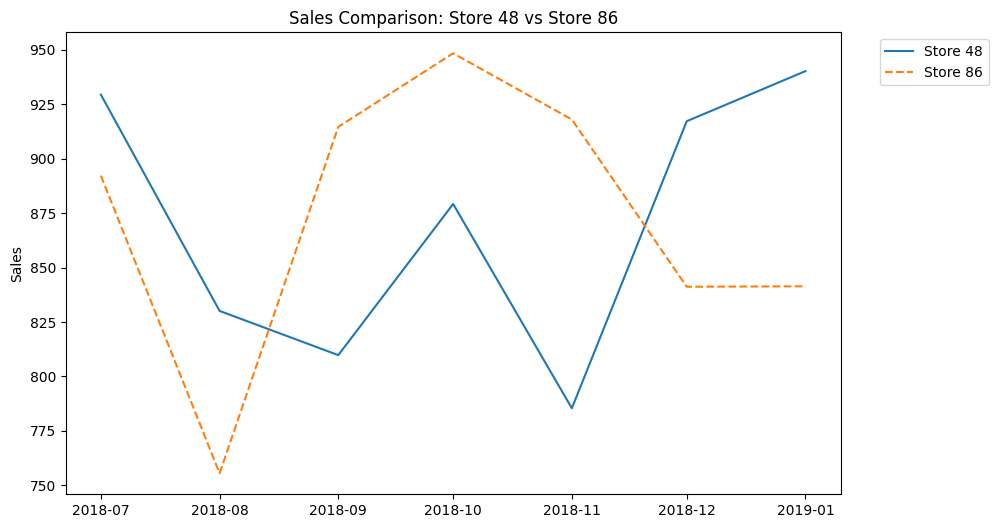

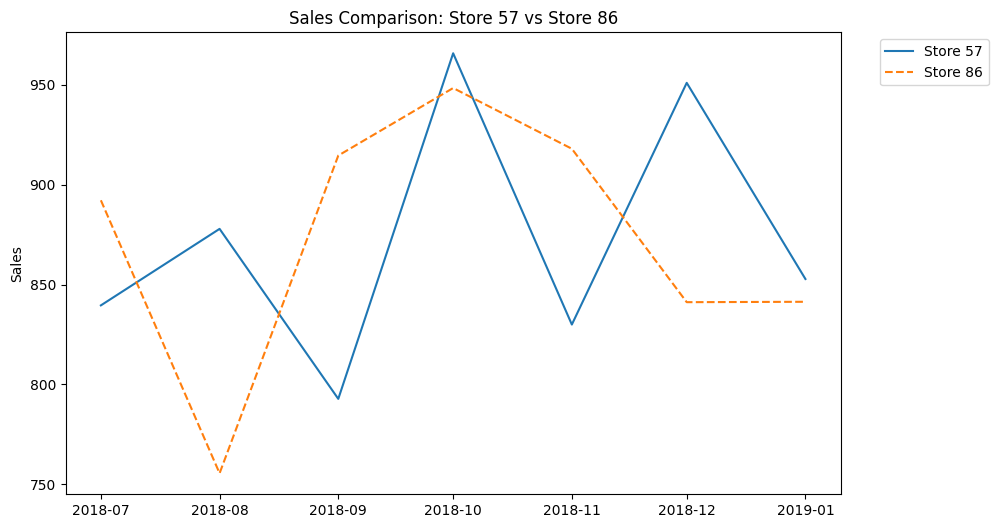

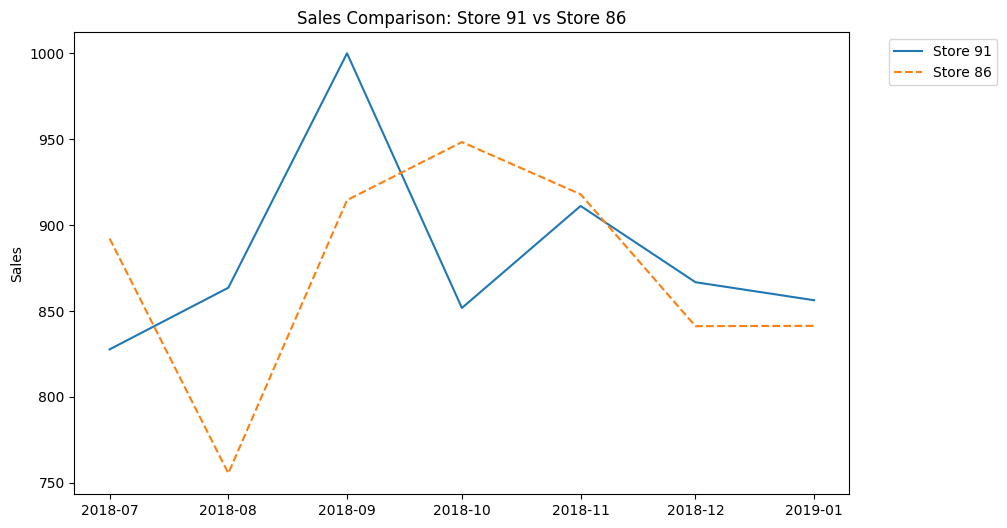

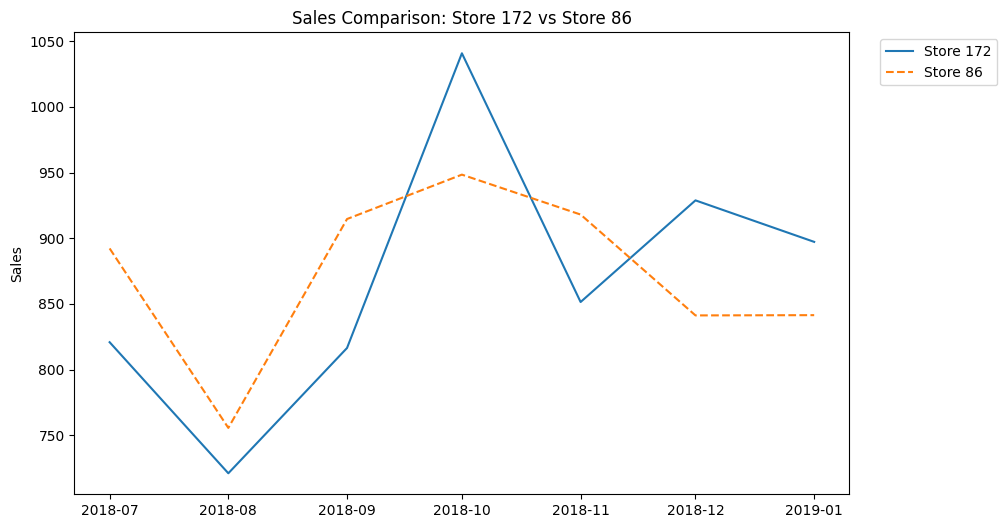

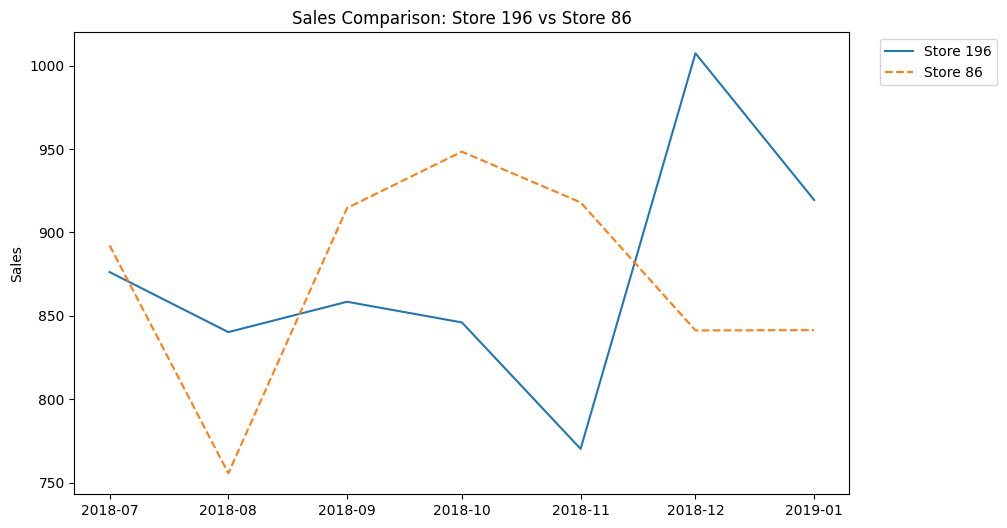

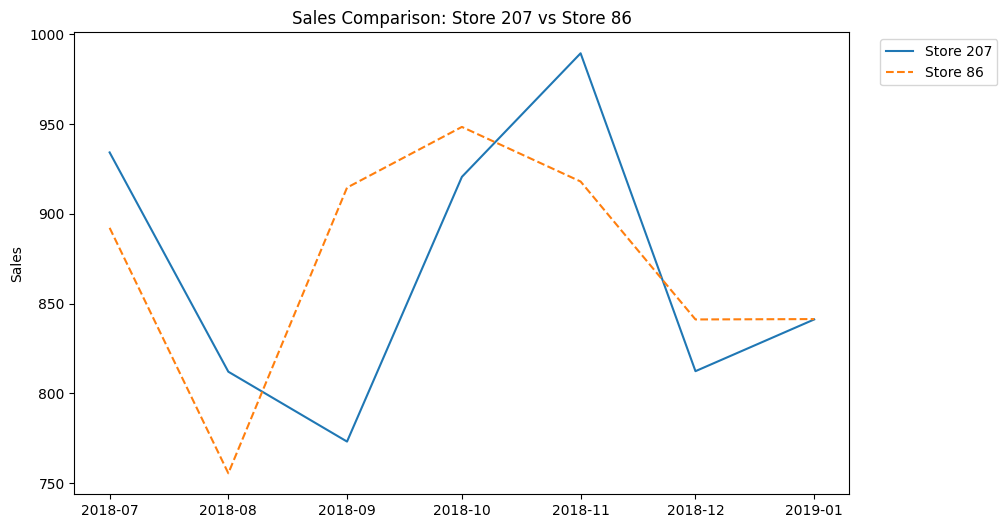

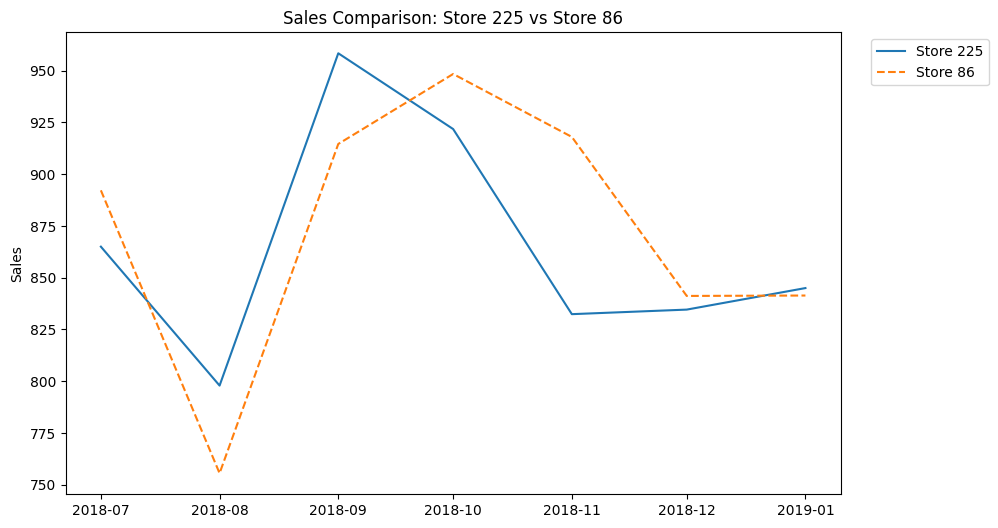

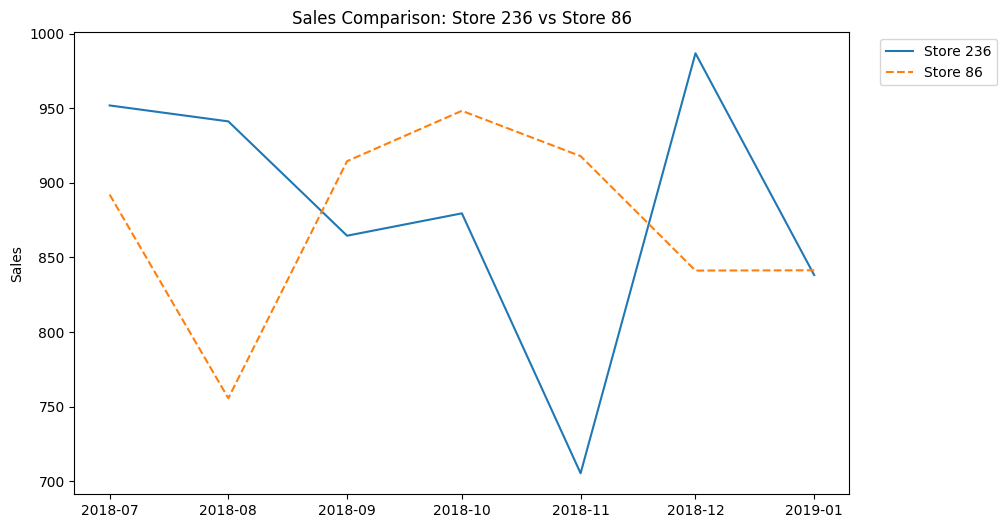

In [162]:
for column in pivot_df_86.columns:
    if column != 86 and column != 'MONTHYEAR':
        plt.figure(figsize=(10, 6))
        plt.plot(pivot_df_86['MONTHYEAR'], pivot_df_86[column], label=f'Store {column}')
        plt.plot(pivot_df_86['MONTHYEAR'], pivot_df_86[86], label='Store 86', linestyle='--')
        plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
        plt.ylabel('Sales')
        plt.title(f'Sales Comparison: Store {column} vs Store 86')
        plt.show()

__Store 225 show a similar trend__

In [163]:
# Perform correlation

In [164]:
df_corr = pivot_df_2.corr()
df_corr

STORE_NBR,13,23,30,48,57,86,91,172,196,207,225,236
STORE_NBR,,,,,,,,,,,,
13,1.000000,-0.128393,-0.369131,-0.204576,-0.167032,0.456174,0.184663,0.326503,-0.222902,0.538884,-0.074346,-0.810567
23,-0.128393,1.000000,0.543691,0.591069,0.397128,-0.733036,-0.693907,-0.113541,0.609406,-0.122868,-0.829698,0.482750
30,-0.369131,0.543691,1.000000,0.320253,0.565896,-0.356480,-0.193556,0.079699,0.750518,-0.424954,-0.217475,0.774459
48,-0.204576,0.591069,0.320253,1.000000,0.394739,-0.144179,-0.693172,0.374226,0.741322,-0.081951,-0.119913,0.561697
57,-0.167032,0.397128,0.565896,0.394739,1.000000,-0.053186,-0.564726,0.668541,0.435937,0.032342,-0.144865,0.438617
86,0.456174,-0.733036,-0.356480,-0.144179,-0.053186,1.000000,0.281946,0.597119,-0.313785,0.512156,0.736602,-0.446427
91,0.184663,-0.693907,-0.193556,-0.693172,-0.564726,0.281946,1.000000,-0.235187,-0.263064,-0.374742,0.546259,-0.385426
172,0.326503,-0.113541,0.079699,0.374226,0.668541,0.597119,-0.235187,1.000000,0.267642,0.268130,0.381969,-0.061468
196,-0.222902,0.609406,0.750518,0.741322,0.435937,-0.313785,-0.263064,0.267642,1.000000,-0.545042,-0.094888,0.692599


__Store 225 has a 74% correlation with store 86__

<Axes: xlabel='STORE_NBR', ylabel='STORE_NBR'>

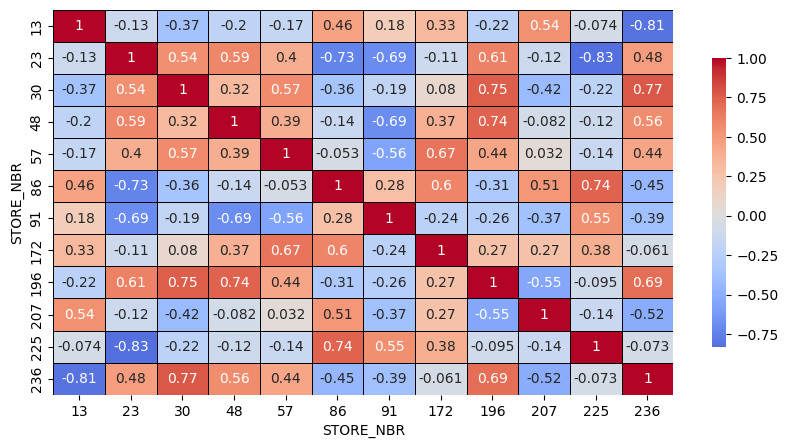

In [165]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_corr, annot=True, fmt='.2g', center=0, cmap='coolwarm', 
                      linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75},
                      annot_kws={"size": 10})  # Adjust font size for annotations
heatmap

| Trial Store | Total Sales | Control Store | Total Sales |
| --- | --- | --- | --- |
| Store 77 | 1699.00 | Store 233 | 1659.8 |
| Store 86 | 6119.85 | Store 225 | 6055.60 |
| Store 88 | 9383.60 | - | - |

In [166]:
# Finding similar stores for store 88

In [167]:
# Determine the index of store88
index_position = total_sales_sorted.index.get_loc(88)
    
# Get the range of indexes
start = index_position - 6
end = index_position + 6 # +5 to include 5 indexes below
print (f'{start}:{end}')

263:275


In [168]:
# Isolating the other stores
# Select the rows using iloc
selected_rows_88 = total_sales_sorted.iloc[263:275]

# Extract the index as a list
index_list_88 = selected_rows_88.index.tolist()

control_store_88 = pd.DataFrame({'Values':total_sales_month_store[index_list_88]})

In [182]:
control_store_88

Values
STORE_NBR MONTHYEAR          
40        2018-07-01  1332.00
          2018-08-01  1208.00
          2018-09-01  1312.00
          2018-10-01  1323.60
          2018-11-01  1099.40
          2018-12-01  1335.40
          2019-01-01  1256.40
203       2018-07-01  1266.80
          2018-08-01  1200.30
          2018-09-01  1266.80
          2018-10-01  1302.70
          2018-11-01  1357.00
          2018-12-01  1336.60
          2019-01-01  1197.00
4         2018-07-01  1399.90
          2018-08-01  1259.50
          2018-09-01  1198.60
          2018-10-01  1346.40
          2018-11-01  1212.00
          2018-12-01  1185.60
          2019-01-01  1525.00
58        2018-07-01  1627.20
          2018-08-01  1021.75
          2018-09-01  1460.80
          2018-10-01  1430.00
          2018-11-01  1165.00
          2018-12-01  1185.60
          2019-01-01  1266.40
165       2018-07-01  1457.00
          2018-08-01  1147.60
          2018-09-01  1281.20
          2018-10-01  1234.40
          2018-11-01  1291.20
          2018-12-01  1345.40
          2019-01-01  1422.00
237       2018-07-01  1448.40
          2018-08-01  1339.30
          2018-09-01  1322.20
          2018-10-01  1348.30
          2018-11-01  1397.60
          2018-12-01  1265.00
          2019-01-01  1219.70
88        2018-07-01  1310.00
          2018-08-01  1301.80
          2018-09-01  1423.00
          2018-10-01  1352.40
          2018-11-01  1382.80
          2018-12-01  1325.20
          2019-01-01  1266.40
226       2018-07-01  1470.00
          2018-08-01  1168.55
          2018-09-01  1430.80
          2018-10-01  1519.00
          2018-11-01  1602.60
          2018-12-01  1659.60
          2019-01-01  1347.10

In [170]:
# Placing control store of 88 in a pivot table

In [172]:
pivot_df_3 = control_store_88.pivot_table(index='MONTHYEAR', columns='STORE_NBR', values='Values')
pivot_df_3

STORE_NBR,4,40,58,88,165,203,226,237
MONTHYEAR,,,,,,,,
2018-07-01,1399.9,1332.0,1627.20,1310.0,1457.0,1266.8,1470.00,1448.4
2018-08-01,1259.5,1208.0,1021.75,1301.8,1147.6,1200.3,1168.55,1339.3
2018-09-01,1198.6,1312.0,1460.80,1423.0,1281.2,1266.8,1430.80,1322.2
2018-10-01,1346.4,1323.6,1430.00,1352.4,1234.4,1302.7,1519.00,1348.3
2018-11-01,1212.0,1099.4,1165.00,1382.8,1291.2,1357.0,1602.60,1397.6
2018-12-01,1185.6,1335.4,1185.60,1325.2,1345.4,1336.6,1659.60,1265.0
2019-01-01,1525.0,1256.4,1266.40,1266.4,1422.0,1197.0,1347.10,1219.7


In [176]:
# Vizualizations of store 88 against other stores

In [177]:
pivot_df_88 = pivot_df_3.reset_index()

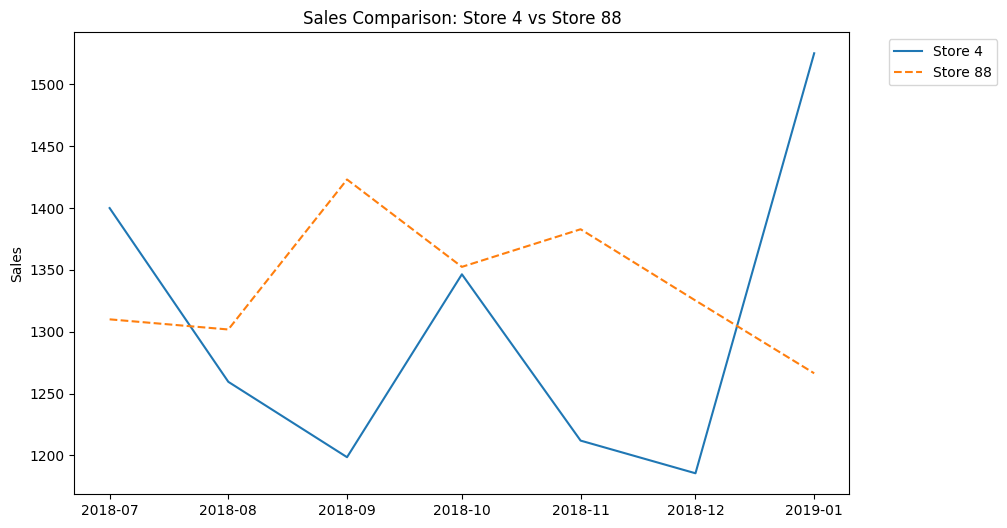

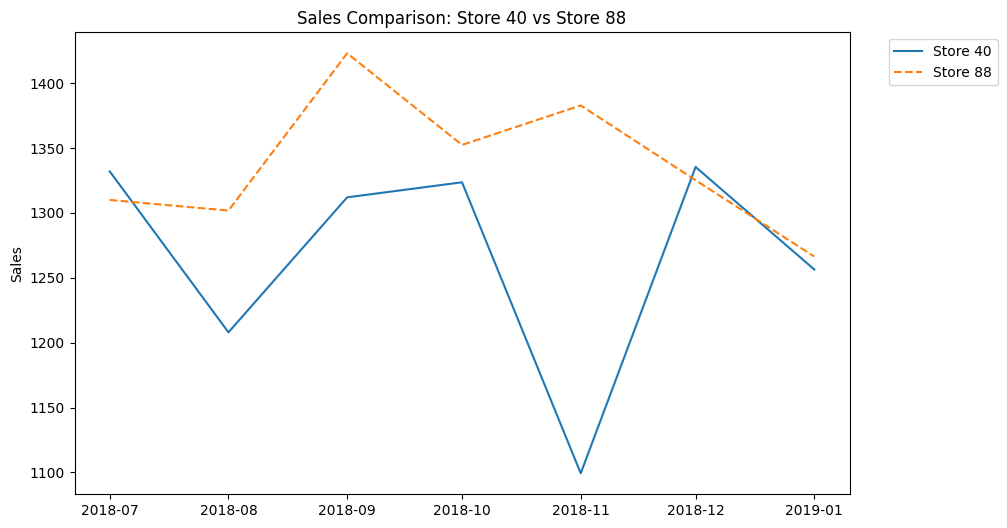

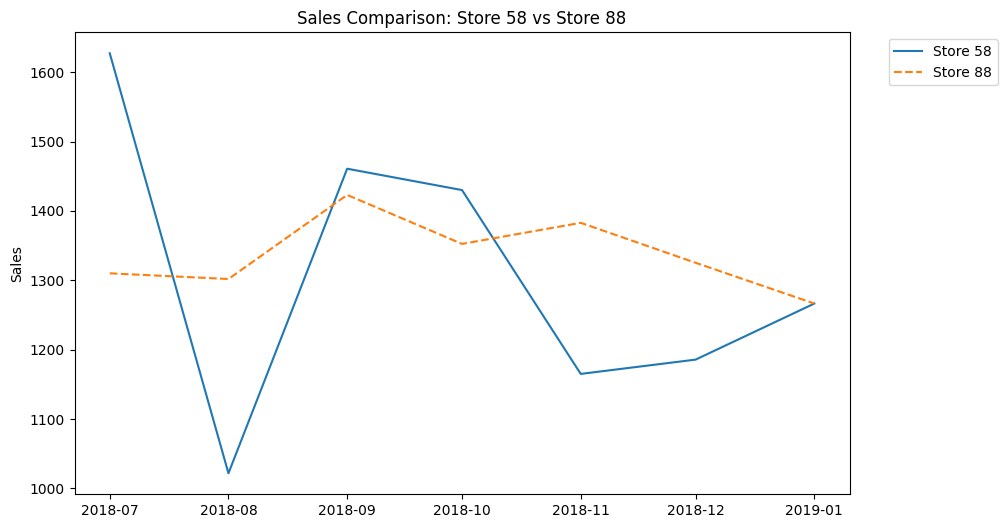

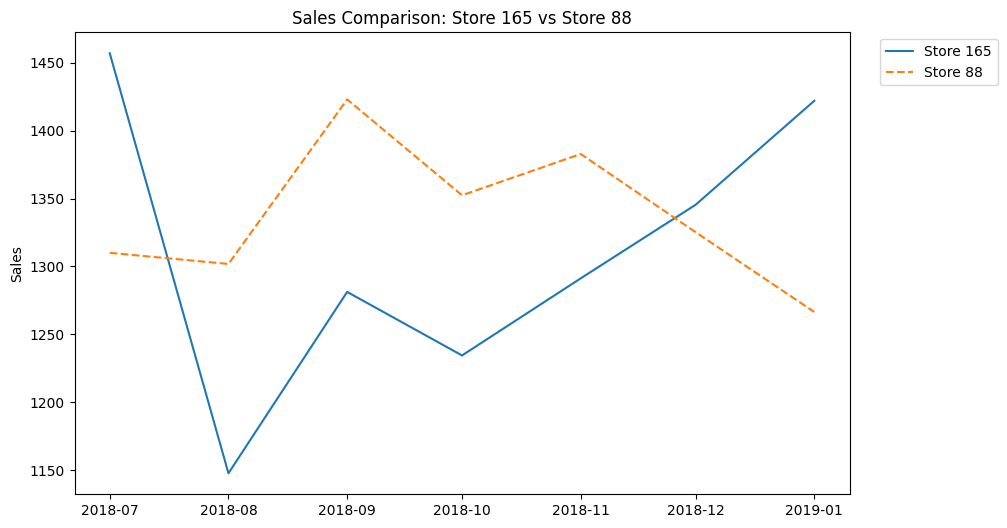

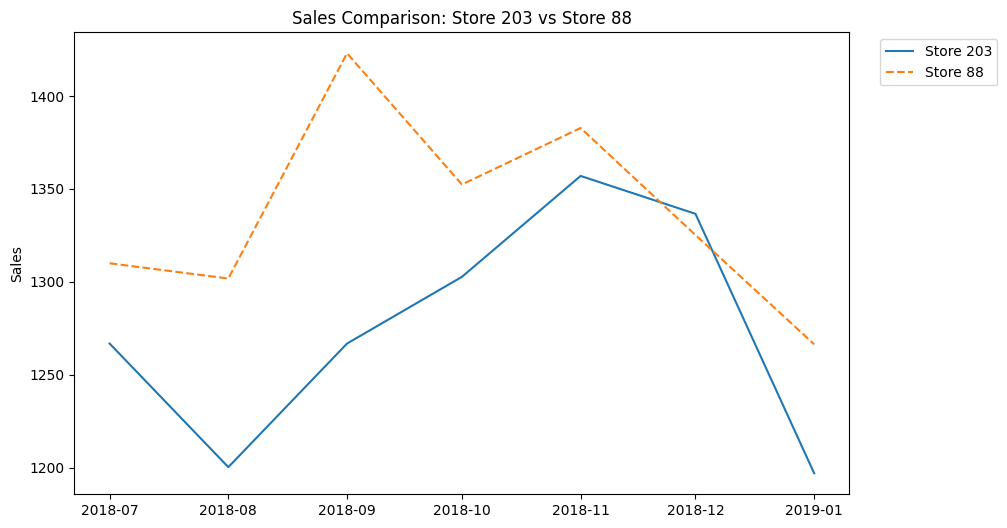

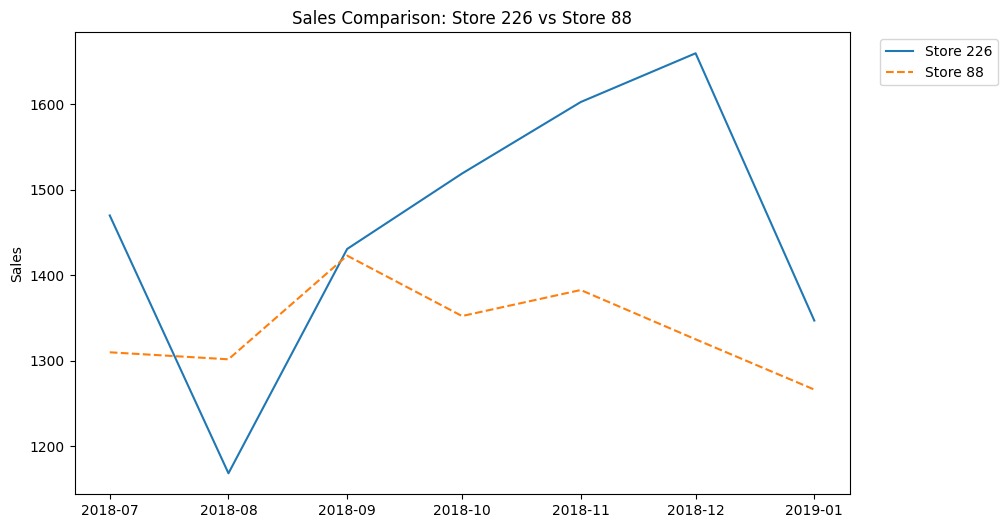

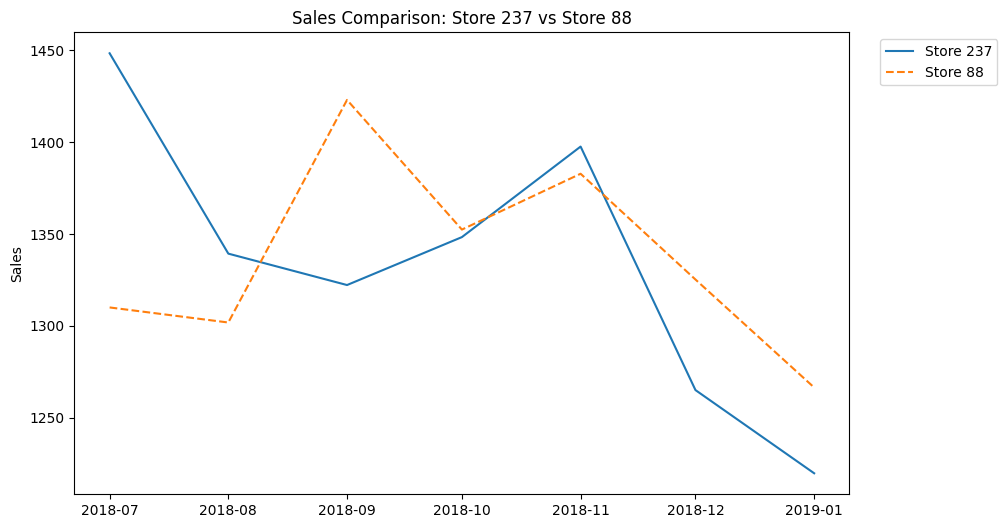

In [178]:
for column in pivot_df_88.columns:
    if column != 88 and column != 'MONTHYEAR':
        plt.figure(figsize=(10, 6))
        plt.plot(pivot_df_88['MONTHYEAR'], pivot_df_88[column], label=f'Store {column}')
        plt.plot(pivot_df_88['MONTHYEAR'], pivot_df_88[88], label='Store 88', linestyle='--')
        plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
        plt.ylabel('Sales')
        plt.title(f'Sales Comparison: Store {column} vs Store 88')
        plt.show()

In [179]:
# Perform correlation

In [180]:
df_corr = pivot_df_3.corr()
df_corr

STORE_NBR,4,40,58,88,165,203,226,237
STORE_NBR,,,,,,,,
4,1.000000,0.173845,0.323482,-0.695264,0.536761,-0.585958,-0.339188,-0.178383
40,0.173845,1.000000,0.618970,-0.096199,0.320018,-0.111596,0.125431,-0.168150
58,0.323482,0.618970,1.000000,0.216689,0.550763,0.062964,0.240077,0.408020
88,-0.695264,-0.096199,0.216689,1.000000,-0.326094,0.563649,0.393219,0.316918
165,0.536761,0.320018,0.550763,-0.326094,1.000000,0.024318,0.350092,-0.024936
203,-0.585958,-0.111596,0.062964,0.563649,0.024318,1.000000,0.921073,0.316497
226,-0.339188,0.125431,0.240077,0.393219,0.350092,0.921073,1.000000,0.118843
237,-0.178383,-0.168150,0.408020,0.316918,-0.024936,0.316497,0.118843,1.000000


__Store 203 has a 56% correlation with store 88__

<Axes: xlabel='STORE_NBR', ylabel='STORE_NBR'>

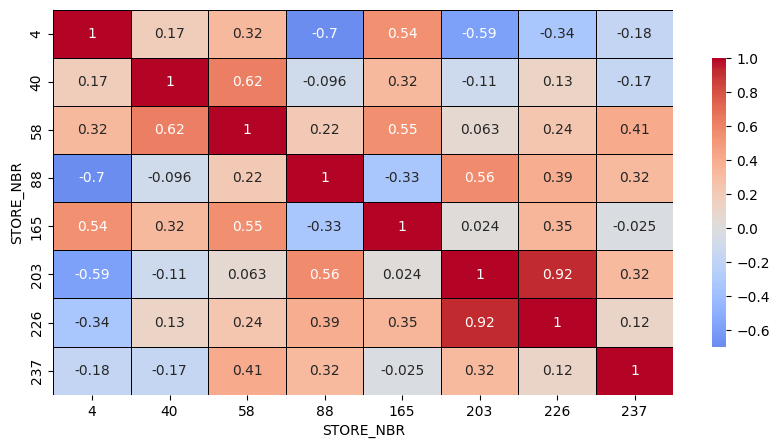

In [181]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_corr, annot=True, fmt='.2g', center=0, cmap='coolwarm', 
                      linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75},
                      annot_kws={"size": 10})  # Adjust font size for annotations
heatmap

| Trial Store | Total Sales | Control Store | Total Sales |
| --- | --- | --- | --- |
| Store 77 | 1699.00 | Store 233 | 1659.8 |
| Store 86 | 6119.85 | Store 225 | 6090.60 |
| Store 88 | 9383.60 | Store 203 | 8943.70 |

## Performance Assessment

### Sales Assessment

In [183]:
# Selecting the trial period of Feb 2019 to March 2019

In [185]:
# Filter data for months of the trial period
posttrial_data = data[(data['MONTHYEAR'] >= trial_month_dt) & (data['MONTHYEAR'] <= trial_month_end_dt)]
posttrial_data["MONTHYEAR"].value_counts()

MONTHYEAR
2019-03-01    22592
2019-04-01    21766
2019-02-01    20405
Name: count, dtype: int64

In [186]:
posttrial_data.to_csv("posttrial.csv")

In [187]:
# Create new dfs for the trial and control stores

In [188]:
tstore77 = posttrial_data[posttrial_data ['STORE_NBR'] == 77] 
tstore86 = posttrial_data[posttrial_data ['STORE_NBR'] == 86] 
tstore88 = posttrial_data[posttrial_data ['STORE_NBR'] == 88] 

In [189]:
cstore233 = posttrial_data[posttrial_data ['STORE_NBR'] == 233] 
cstore225 = posttrial_data[posttrial_data ['STORE_NBR'] == 225] 
cstore203 = posttrial_data[posttrial_data ['STORE_NBR'] == 203] 

In [215]:
# Compare stores

In [222]:
import pandas as pd

def compare_stores(test_store_df, control_store_df):
    # Calculate metrics for test store
    test_tot_sales = test_store_df[['TOT_SALES', 'PROD_QTY']].sum().round(0)
    test_customer_count = test_store_df[['LYLTY_CARD_NBR']].nunique().round(0)
    test_transactions = test_store_df[['LYLTY_CARD_NBR']].count().round(0)
    test_avg_transactions = test_store_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().mean()
    test_repeat_customers = test_store_df['LYLTY_CARD_NBR'].value_counts()
    test_multiple_transactions = len(test_repeat_customers[test_repeat_customers > 1])
    
    # Calculate metrics for control store
    control_tot_sales = control_store_df[['TOT_SALES', 'PROD_QTY']].sum().round(0)
    control_customer_count = control_store_df[['LYLTY_CARD_NBR']].nunique().round(0)
    control_transactions = control_store_df[['LYLTY_CARD_NBR']].count().round(0)
    control_avg_transactions = control_store_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().mean()
    control_repeat_customers = control_store_df['LYLTY_CARD_NBR'].value_counts()
    control_multiple_transactions = len(control_repeat_customers[control_repeat_customers > 1])
    
    # Create a dataframe to hold the results
    results = pd.DataFrame({
        'Metric': ['Total Sales', 'Total Quantity', 'Customer Count', 'Total Transactions', 'Average Transactions per Customer', 'Multiple Transactions'],
        'Test Store': [test_tot_sales['TOT_SALES'], test_tot_sales['PROD_QTY'], test_customer_count['LYLTY_CARD_NBR'], test_transactions['LYLTY_CARD_NBR'], round(test_avg_transactions, 2), test_multiple_transactions],
        'Control Store': [control_tot_sales['TOT_SALES'], control_tot_sales['PROD_QTY'], control_customer_count['LYLTY_CARD_NBR'], control_transactions['LYLTY_CARD_NBR'], round(control_avg_transactions, 2), control_multiple_transactions]
    })
    
    return results

In [223]:
comparison_results_77_233 = compare_stores(tstore77, cstore233)
comparison_results_77_233

,Metric,Test Store,Control Store
0,Total Sales,777.00,602.00
1,Total Quantity,234.00,175.00
2,Customer Count,124.00,112.00
3,Total Transactions,148.00,121.00
4,Average Transactions per Customer,1.19,1.08
5,Multiple Transactions,24.00,9.00


In [225]:
# group stores by month
grouped77 = tstore77.groupby("MONTHYEAR")
grouped233 = cstore233.groupby("MONTHYEAR")

In [239]:
import matplotlib.pyplot as plt

def plot_sales_comparison(grouped1, grouped2, label1="Trial Store", label2="Control Store"):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    
    # Plot the total sales for both groups
    grouped1["TOT_SALES"].sum().plot(label=label1)
    grouped2["TOT_SALES"].sum().plot(label=label2)
    
    # Remove ticks and spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Set labels and title
    plt.ylabel("Sales")
    plt.legend()
    plt.title("Sales Post Trial Date")
    plt.show()

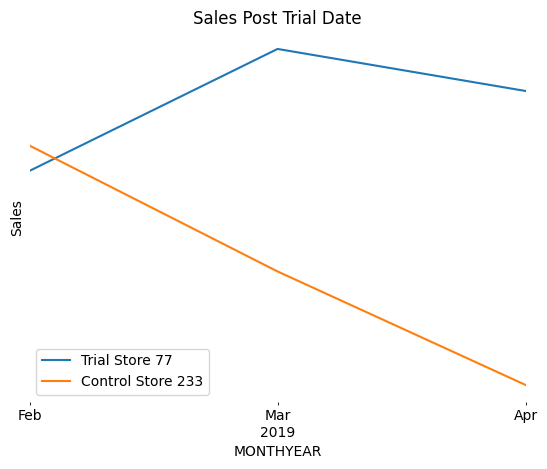

In [240]:
plot_sales_comparison(grouped77, grouped233, label1="Trial Store 77", label2="Control Store 233")

In [227]:
# Store 86 and 225

In [229]:
comparison_results_86_225 = compare_stores(tstore86, cstore225)
comparison_results_86_225

,Metric,Test Store,Control Store
0,Total Sales,2788.0,2638.0
1,Total Quantity,815.0,784.0
2,Customer Count,215.0,206.0
3,Total Transactions,408.0,392.0
4,Average Transactions per Customer,1.9,1.9
5,Multiple Transactions,123.0,114.0


In [230]:
# group stores by month
grouped86 = tstore86.groupby("MONTHYEAR")
grouped225 = cstore225.groupby("MONTHYEAR")

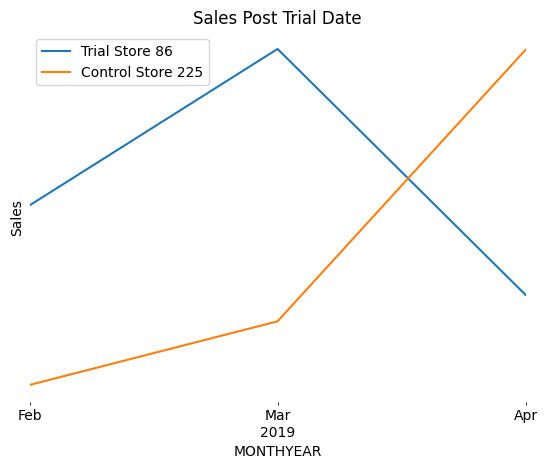

In [241]:
plot_sales_comparison(grouped86, grouped225, label1="Trial Store 86", label2="Control Store 225")

In [242]:
# Store 88 and 203

In [243]:
comparison_results_88_203 = compare_stores(tstore88, cstore203)
comparison_results_88_203

,Metric,Test Store,Control Store
0,Total Sales,4287.00,3271.00
1,Total Quantity,972.00,742.00
2,Customer Count,261.00,252.00
3,Total Transactions,486.00,371.00
4,Average Transactions per Customer,1.86,1.47
5,Multiple Transactions,145.00,91.00


In [244]:
# group stores by month
grouped88 = tstore88.groupby("MONTHYEAR")
grouped203 = cstore203.groupby("MONTHYEAR")

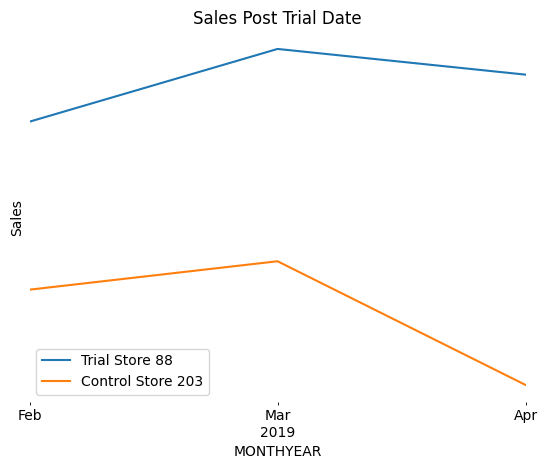

In [245]:
plot_sales_comparison(grouped88, grouped203, label1="Trial Store 88", label2="Control Store 203")

### Quantity Assessment

In [197]:
# Vizualize with PROD_QTY

In [246]:
def plot_product_quantity_comparison(grouped1, grouped2, label1="Trial Store", label2="Control Store"):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    
    # Plot the product quantity sold for both groups
    grouped1["PROD_QTY"].sum().plot(label=label1)
    grouped2["PROD_QTY"].sum().plot(label=label2)
    
    # Remove ticks and spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Set labels and title
    plt.ylabel("Product Sold")
    plt.legend()
    plt.title("Product Sold Post Trial Date")
    plt.show()

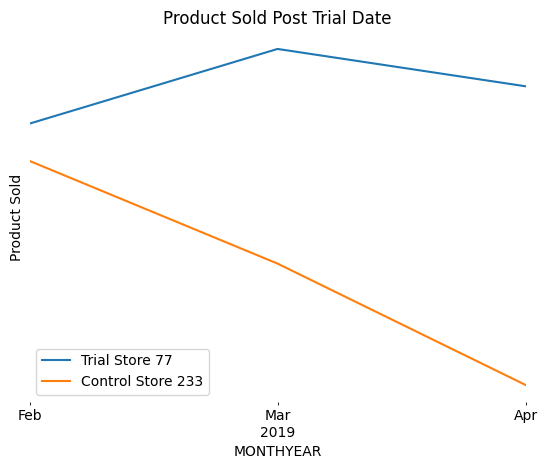

In [252]:
plot_product_quantity_comparison(grouped77, grouped233, label1="Trial Store 77", label2="Control Store 233")

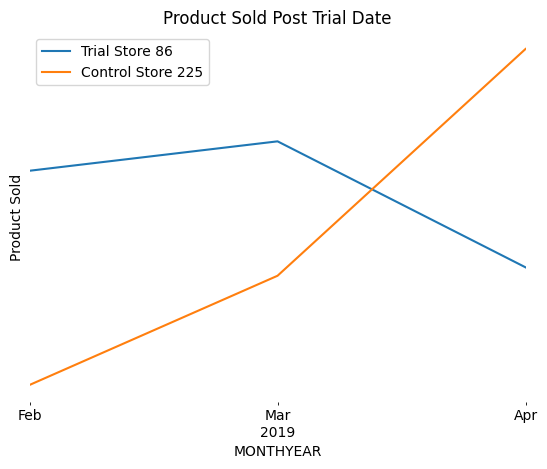

In [253]:
plot_product_quantity_comparison(grouped86, grouped225, label1="Trial Store 86", label2="Control Store 225")

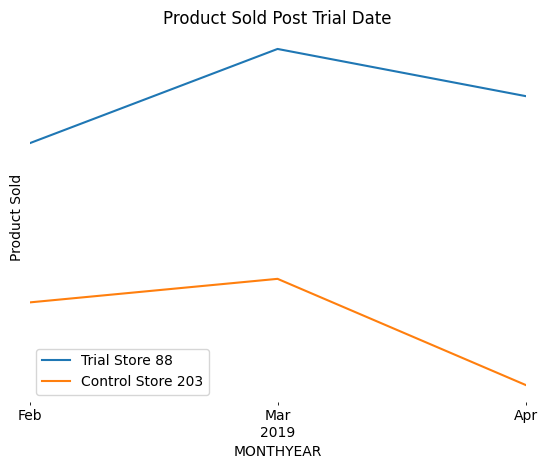

In [254]:
plot_product_quantity_comparison(grouped88, grouped203, label1="Trial Store 88", label2="Control Store 203")

In [255]:
# Visualize Avg product per customer

In [257]:
def calculate_average_transactions(store_df):
    avggrouped = store_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count()
    return avggrouped.mean()

def plot_average_transactions(groups, values, colors, title="Average Product Bought Per Customer"):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

    for group, value, color in zip(groups, values, colors):
        plt.bar(group, value, label=group, color=color)

    plt.ylabel("Average Transactions")
    plt.xlabel("Store Groups")  # Add x-axis label
    plt.title(title, fontsize=16)  # Adjust title font size
    plt.legend()
    plt.show()

In [258]:
average_transactions_77 = calculate_average_transactions(tstore77)
average_transactions_233 = calculate_average_transactions(cstore233)
average_transactions_86 = calculate_average_transactions(tstore86)
average_transactions_225 = calculate_average_transactions(cstore225)
average_transactions_88 = calculate_average_transactions(tstore88)
average_transactions_203 = calculate_average_transactions(cstore203)

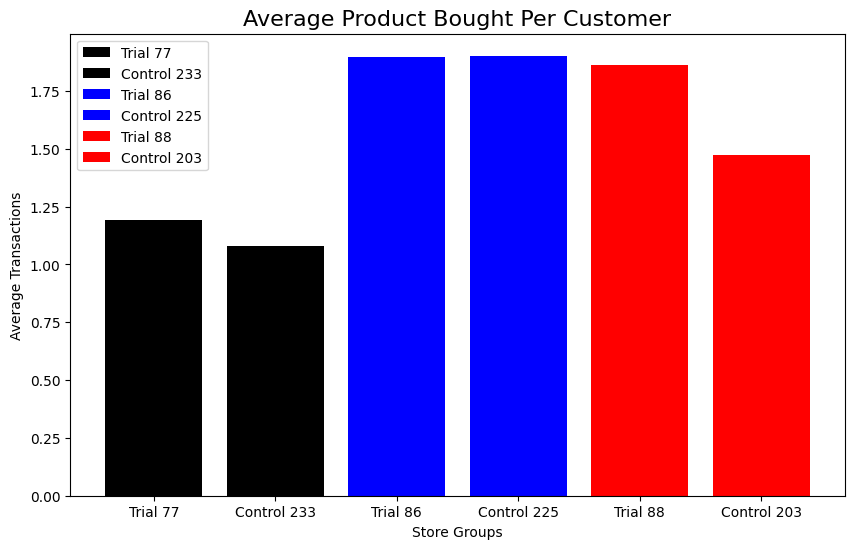

In [259]:
groups = [['Trial 77', 'Control 233'], ['Trial 86', 'Control 225'], ['Trial 88', 'Control 203']]
values = [[average_transactions_77, average_transactions_233], [average_transactions_86, average_transactions_225], [average_transactions_88, average_transactions_203]]
colors = ['black', 'blue', 'red']

plot_average_transactions(groups, values, colors)

<span style="font-size: 18px;">The analysis conducted above underscores the effectiveness of the strategies implemented in the trial stores. Notably, the trial __stores 77 and 88__ outperformed the control stores in terms of both quantity sold and total sales. However, to provide more robust insights and recommendations, running the trial stores for a longer period for additional monthly data would be beneficial. </span>

In [260]:
# Save merged df as a csv
data.to_csv("QVI_c.csv")

In [261]:
# Filter pretrial data for stores 77, 86, and 88
pre_77_86_88 = pretrial_data[pretrial_data['STORE_NBR'].isin([77, 86, 88])]

# Filter post-trial data for the same stores
post_77_86_88 = posttrial_data[posttrial_data['STORE_NBR'].isin([77, 86, 88])]

In [87]:
post_77_86_88.to_csv('post_77.csv')

In [88]:
pre_77_86_88.to_csv('pre_77.csv')

<div style="text-align: center;">
    <img src="https://th.bing.com/th/id/R.d5072cbc4479a87f5a79ef29a703d5c2?rik=VYei3xAw3%2bJ%2fpg&pid=ImgRaw&r=0" alt="Chips" style="width: 500px;" />
</div>